In [120]:
# imports
import pathlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [65]:
# pandas settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 2)

In [3]:
# create dataframes
treatment_csv = pathlib.Path('test_data.csv')
treatment_df = pd.read_csv(treatment_csv)

In [4]:
# get columns
treatment_df.columns

Index(['age', 'gender', 'race', 'treatment', 'vote_registration'], dtype='object')

In [5]:
# create working copy
working_copy_df = treatment_df

In [10]:
# get values
working_copy_df.gender.unique()
working_copy_df.race.unique()
working_copy_df.treatment.unique()
working_copy_df.vote_registration.unique()

array(['Not Registered', 'Registered'], dtype=object)

In [51]:
#create age bins

bins = [-np.inf, 28, 44, 60, 70, 80, 97, 103, np.inf]
generation_label = ['Gen Z (Under 28)', 'Millennial (28-43)', 'Gen X (44-59)', 'Young Boomers (60-69)', 'Old Boomers (70-79)', 'Post-War (79-96)', 'WWII (97-102)', 'Depression and Older (103 and older)'  ]
working_copy_df['generation'] = pd.cut(working_copy_df['age'], bins=bins, labels=generation_label, right=False).cat.add_categories('missing').fillna('missing')

result = working_copy_df.groupby('generation').agg({'age': ['count', 'min', 'max']}) 
print(result)


                                         age              
                                       count    min    max
generation                                                
Gen Z (Under 28)                       72230   19.0   27.0
Millennial (28-43)                    212311   28.0   43.0
Gen X (44-59)                         165227   44.0   59.0
Young Boomers (60-69)                 101997   60.0   69.0
Old Boomers (70-79)                    50608   70.0   79.0
Post-War (79-96)                       32446   80.0   96.0
WWII (97-102)                           2699   97.0  102.0
Depression and Older (103 and older)     182  103.0  115.0
missing                                    0    NaN    NaN


/var/folders/48/pzsf5jjs0wj756yk19j79q0w0000gn/T/ipykernel_8255/3673792598.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = working_copy_df.groupby('generation').agg({'age': ['count', 'min', 'max']})


In [47]:
working_copy_df['age_quartile'] = pd.qcut(working_copy_df['age'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

working_copy_df['age_quartile'].value_counts()
result = working_copy_df.groupby('age_quartile').agg({'age': ['count', 'min', 'max']}) 
print(result)



                 age         
               count min  max
age_quartile                 
Q1            169776  19   34
Q2            152973  35   47
Q3            161136  48   62
Q4            153815  63  115


/var/folders/48/pzsf5jjs0wj756yk19j79q0w0000gn/T/ipykernel_8255/1456331561.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = working_copy_df.groupby('age_quartile').agg({'age': ['count', 'min', 'max']})


In [52]:
pd.crosstab(working_copy_df.age_quartile, working_copy_df.generation)

generation,Gen Z (Under 28),Millennial (28-43),Gen X (44-59),Young Boomers (60-69),Old Boomers (70-79),Post-War (79-96),WWII (97-102),Depression and Older (103 and older)
age_quartile,,,,,,,,
Q1,72230,97546,0,0,0,0,0,0
Q2,0,114765,38208,0,0,0,0,0
Q3,0,0,127019,34117,0,0,0,0
Q4,0,0,0,67880,50608,32446,2699,182


In [66]:
# generations don't split evenly across quartiles, we'll use generation rather than quartile

pd.crosstab(working_copy_df.generation, working_copy_df.race)

working_copy_df['generation-sex-age'] = working_copy_df.generation.astype(str) + working_copy_df.gender.astype(str) + working_copy_df.race.astype(str)

result = working_copy_df.groupby('generation-sex-age').agg({'age': ['count', 'min', 'max']}) 
display(result)


age            
                                                   count  min  max 
generation-sex-age                                                 
Depression and Older (103 and older)FemaleAfric...     14  103  113
Depression and Older (103 and older)FemaleAsian         1  103  103
Depression and Older (103 and older)FemaleCauca...     89  103  115
Depression and Older (103 and older)MaleAfrican...      7  103  111
Depression and Older (103 and older)MaleCaucasian      64  103  115
Depression and Older (103 and older)MaleUncoded         2  105  106
Depression and Older (103 and older)UnknownAfri...      2  109  109
Depression and Older (103 and older)UnknownCauc...      3  108  115
Gen X (44-59)FemaleAfrican-American                 14784   44   59
Gen X (44-59)FemaleAsian                              852   44   59
Gen X (44-59)FemaleCaucasian                        74090   44   59
Gen X (44-59)FemaleHispanic                          4007   44   59
Gen X (44-59)FemaleNative American                    341   44   59
Gen X (44-59)FemaleUncoded                           4518   44   59
Gen X (44-59)MaleAfrican-American                    9016   44   59
Gen X (44-59)MaleAsian                                501   44   59
Gen X (44-59)MaleCaucasian                          40356   44   59
Gen X (44-59)MaleHispanic                            2708   44   59
Gen X (44-59)MaleNative American                      158   44   59
Gen X (44-59)MaleUncoded                             2285   44   59
Gen X (44-59)UnknownAfrican-American                 3547   44   59
Gen X (44-59)UnknownAsian                             842   44   59
Gen X (44-59)UnknownCaucasian                        5392   44   59
Gen X (44-59)UnknownHispanic                          532   44   59
Gen X (44-59)UnknownNative American                    30   44   59
Gen X (44-59)UnknownUncoded                          1268   44   59
Gen Z (Under 28)FemaleAfrican-American               2902   19   27
Gen Z (Under 28)FemaleAsian                           359   19   27
Gen Z (Under 28)FemaleCaucasian                     30790   19   27
Gen Z (Under 28)FemaleHispanic                       1772   19   27
Gen Z (Under 28)FemaleNative American                  78   19   27
Gen Z (Under 28)FemaleUncoded                        1911   19   27
Gen Z (Under 28)MaleAfrican-American                 1420   19   27
Gen Z (Under 28)MaleAsian                             171   19   27
Gen Z (Under 28)MaleCaucasian                       17997   19   27
Gen Z (Under 28)MaleHispanic                          876   19   27
Gen Z (Under 28)MaleNative American                    34   19   27
Gen Z (Under 28)MaleUncoded                           906   19   27
Gen Z (Under 28)UnknownAfrican-American              3115   19   27
Gen Z (Under 28)UnknownAsian                          457   19   27
Gen Z (Under 28)UnknownCaucasian                     7792   19   27
Gen Z (Under 28)UnknownHispanic                       517   19   27
Gen Z (Under 28)UnknownNative American                 29   19   27
Gen Z (Under 28)UnknownUncoded                       1104   19   27
Millennial (28-43)FemaleAfrican-American            13277   28   43
Millennial (28-43)FemaleAsian                         914   28   43
Millennial (28-43)FemaleCaucasian                   95683   28   43
Millennial (28-43)FemaleHispanic                     4844   28   43
Millennial (28-43)FemaleNative American               353   28   43
Millennial (28-43)FemaleUncoded                      6870   28   43
Millennial (28-43)MaleAfrican-American               5795   28   43
Millennial (28-43)MaleAsian                           479   28   43
Millennial (28-43)MaleCaucasian                     55567   28   43
Millennial (28-43)MaleHispanic                       2637   28   43
Millennial (28-43)MaleNative American                 143   28   43
Millennial (28-43)MaleUncoded                        3341   28   43
Millennial (28-43)UnknownAfrican-America

In [75]:
# naive count
pd.crosstab(working_copy_df['treatment'], working_copy_df['vote_registration'])

vote_registration,Not Registered,Registered
treatment,,
Control,244896,143478
Message A,77887,46771
Message B,78214,46454


In [119]:
count_table = pd.crosstab(
    [working_copy_df['generation'],working_copy_df['gender'], working_copy_df['race']], # rows
    [working_copy_df.treatment, working_copy_df.vote_registration], #columns
    margins=True, # give subtotals
    margins_name = "Subs",
)

perc_table = pd.crosstab(
    [working_copy_df['generation'],working_copy_df['gender'], working_copy_df['race']], # rows
    [working_copy_df.treatment, working_copy_df.vote_registration], #columns
    #margins=True, # give subtotals
    #margins_name = "Subs",
    normalize = "index"
)


analysis_table = pd.concat([count_table, perc_table], keys=['Count', 'Percentage'])
display(count_table)

treatment                                                        Control                  Message A                 Message B                 Subs 
vote_registration                                             Not Registered Registered Not Registered Registered Not Registered Registered        
generation                           gender  race                                                                                                  
Gen Z (Under 28)                     Female  African-American       1555          183          491           50          552           71      2902
                                             Asian                   171           46           52           18           54           18       359
                                             Caucasian             13401         5244         4427         1700         4358         1660     30790
                                             Hispanic                918          156          293           49          305           51      1772
                                             Native American          40            8           13            1           12            4        78
                                             Uncoded                 876          254          303           99          296           83      1911
                                     Male    African-American        794           91          254           20          239           22      1420
                                             Asian                    70           22           26           12           37            4       171
                                             Caucasian              7839         3071         2555          998         2528         1006     17997
                                             Hispanic                468           71          140           20          145           32       876
                                             Native American          17            2            6            1            6            2        34
                                             Uncoded                 435          117          117           46          154           37       906
                                     Unknown African-American       1719          153          590           45          562           46      3115
                                             Asian                   242           48           78           13           62           14       457
                                             Caucasian              3662         1160         1117          358         1117          378      7792
                                             Hispanic                268           45           97           13           84           10       517
                                             Native American          20            1            3            0            2            3        29
                                             Uncoded                 554          148          153           44          154           51      1104
Millennial (28-43)                   Female  African-American       6768         1326         2162          432         2148          441     13277
                                             Asian                   411          140          134           43          139           47       914
                                             Caucasian             37946        20346        12040         6650        12051         6650     95683
                                             Hispanic               2420          506          784          168          808          158      4844
                                             Native American         161           54           60           13           48           17       353
                                             Uncoded                3106         1092          980          368          987          337      6870
    

TypeError: unsupported operand type(s) for +: 'int' and 'str'

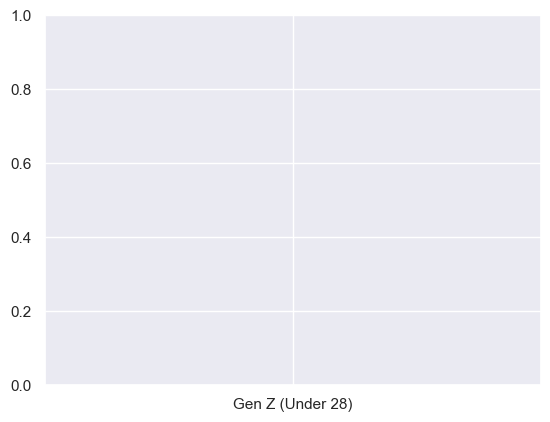

In [122]:

# sns.set_theme(style="darkgrid")

# fig, axs = plt.subplots(2, 2, figsize=(7, 7))

# sns.histplot(data=working_copy_df, x="registration", kde=True, color="skyblue", ax=axs[0, 0])
# sns.histplot(data=working_copy_df, x="sepal_width", kde=True, color="olive", ax=axs[0, 1])
# sns.histplot(data=working_copy_df, x="petal_length", kde=True, color="gold", ax=axs[1, 0])
# sns.histplot(data=working_copy_df, x="petal_width", kde=True, color="teal", ax=axs[1, 1])

# plt.show()

df = working_copy_df
sns.set()
ax = sns.histplot(data=df, x='generation', hue='treatment',
                  weights='vote_registration', multiple='stack',
                  palette=['orange', 'gold', 'tomato'])
ax.legend(handles=ax.legend_.legendHandles, labels=hue_order, bbox_to_anchor=(1.02, 0.98), loc='upper left')
ax.set_ylabel('Percentage')
plt.tight_layout()
plt.show()